# Neural Network For Handwritten Digits Classification 

In [1]:
#import paskages

import tensorflow as tf 
from tensorflow import keras

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load datasets and split
(X_train ,y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
#length X_train 
len(X_train)

60000

In [4]:
#length X_test
len(X_test)

10000

In [5]:
#shape sample image 
X_train[0].shape

(28, 28)

In [6]:
#normalization image
X_train= X_train/255
X_test= X_test/255

<Figure size 640x480 with 0 Axes>

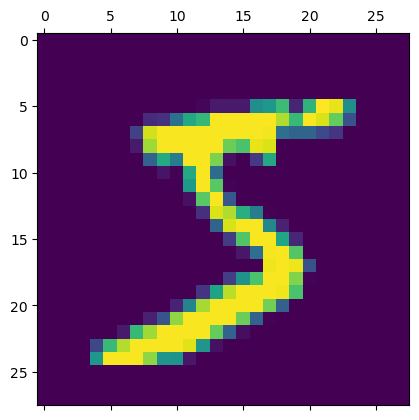

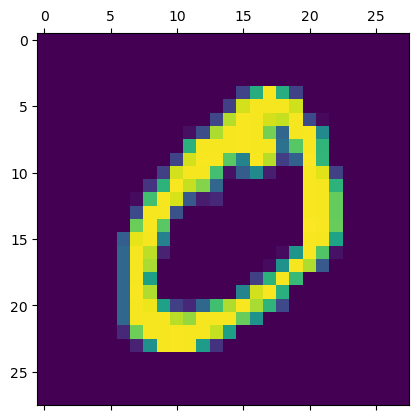

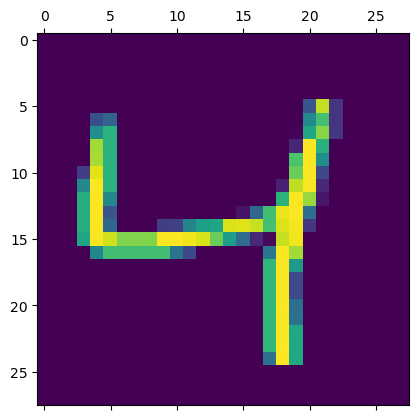

In [7]:
#show sample  image 
plt.figure() 
plt.matshow(X_train[0])
plt.matshow(X_train[1])
plt.matshow(X_train[2])

plt.show()

In [8]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [9]:
#reshape image
X_train_flatten = X_train.reshape(len(X_train) , 28*28)

X_test_flatten = X_test.reshape(len(X_test) , 28*28)

In [10]:
X_test_flatten.shape

(10000, 784)

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) ,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4759 - accuracy: 0.8741
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [13]:
#Evaluation model
model.evaluate(X_test_flatten ,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.9224


[0.27536144852638245, 0.9223999977111816]

In [14]:
#predicted X_test data 
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


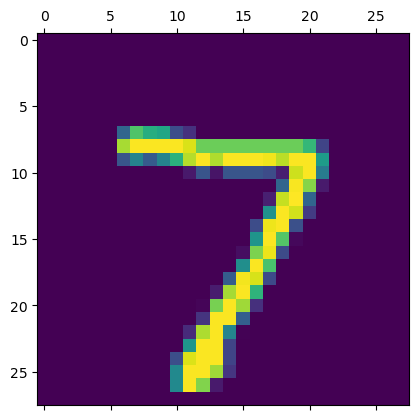

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted[0]

array([1.3908814e-02, 3.6345187e-07, 3.2406725e-02, 9.6599013e-01,
       2.5249131e-03, 1.2461375e-01, 1.2617041e-06, 9.9978852e-01,
       8.3072931e-02, 5.6014848e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

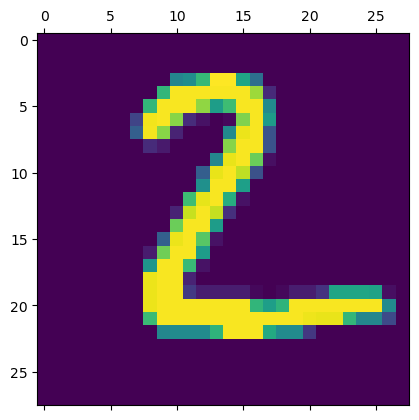

In [18]:
plt.matshow(X_test[1])

In [19]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted_labels = np.argmax(y_predicted, axis=1)


In [21]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    7,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  883,   39,   12,    5,   12,   12,   49,    4],
       [   1,    0,    7,  946,    0,   20,    2,   12,   14,    8],
       [   1,    1,    2,    1,  926,    0,   12,    3,   10,   26],
       [   7,    1,    2,   47,   11,  769,   17,    5,   27,    6],
       [   9,    3,    3,    1,    7,   10,  922,    2,    1,    0],
       [   1,    5,   17,   13,    8,    0,    0,  953,    3,   28],
       [   5,    6,    6,   38,    9,   31,    9,   13,  847,   10],
       [  10,    7,    1,   14,   36,    8,    0,   24,    3,  906]])>

Text(50.722222222222214, 0.5, 'Truth')

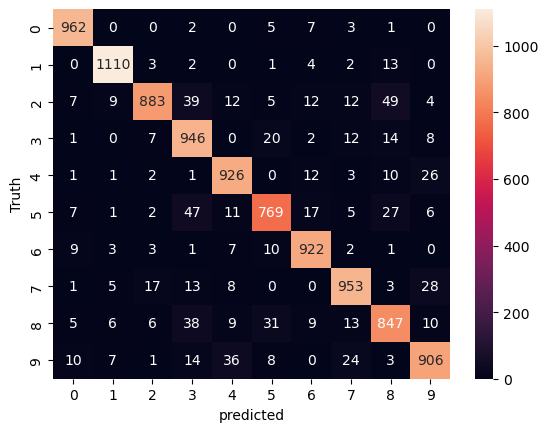

In [22]:
plt.figure()
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [23]:
#Add hidden layer

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape=(784,) ,activation='relu'),
    keras.layers.Dense(10 ,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2738 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0540 - accuracy: 0.9832


In [25]:
model.evaluate(X_test_flatten ,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0761 - accuracy: 0.9764


[0.07612431794404984, 0.9764000177383423]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    7,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  883,   39,   12,    5,   12,   12,   49,    4],
       [   1,    0,    7,  946,    0,   20,    2,   12,   14,    8],
       [   1,    1,    2,    1,  926,    0,   12,    3,   10,   26],
       [   7,    1,    2,   47,   11,  769,   17,    5,   27,    6],
       [   9,    3,    3,    1,    7,   10,  922,    2,    1,    0],
       [   1,    5,   17,   13,    8,    0,    0,  953,    3,   28],
       [   5,    6,    6,   38,    9,   31,    9,   13,  847,   10],
       [  10,    7,    1,   14,   36,    8,    0,   24,    3,  906]])>

Text(50.722222222222214, 0.5, 'Truth')

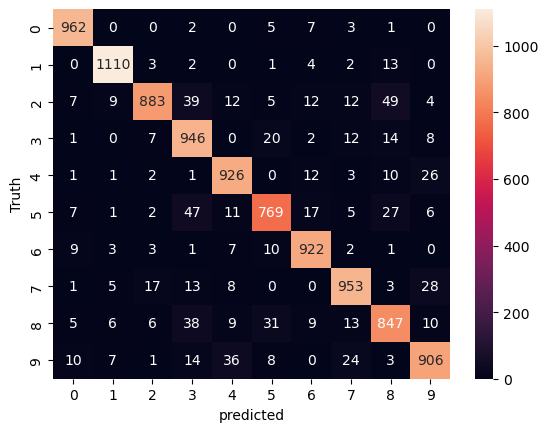

In [27]:
plt.figure()
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [28]:

#Layer flatten

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 ,activation='relu'),
    keras.layers.Dense(10 ,activation="sigmoid")
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train, y_train , epochs=5 , callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6566 - accuracy: 0.8328
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3333 - accuracy: 0.9068
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2840 - accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2528 - accuracy: 0.9284
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2297 - accuracy: 0.9344
